In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales=pd.read_csv("E:\Data science training\R AND PYTHON KPMG\stat and ml\ASSIGNMENT\Dharma Initiative Sales Data.csv",index_col='Period',parse_dates=True)
sales


,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,16010072.12,12729,1257.763541,30024676
2015-01-02,15807587.45,11636,1358.507000,30024676
2015-01-03,22047146.02,15922,1384.697024,30024676
2015-01-04,18814583.29,15227,1235.606705,30024676
2015-01-05,14021479.61,8620,1626.621765,30024676
...,...,...,...,...
2019-01-12,58756473.66,38069,1543.420464,29878525
2020-01-01,56288300.87,27184,2070.640850,29044998
2020-01-02,40225243.26,23509,1711.057181,29044998


In [3]:
sales1=sales.drop(columns=['Revenue','Average_cost','The_average_annual_payroll_of_the_region'])

In [4]:
sales1.head()

,Sales_quantity
Period,
2015-01-01,12729
2015-01-02,11636
2015-01-03,15922
2015-01-04,15227
2015-01-05,8620


<AxesSubplot:xlabel='Period'>

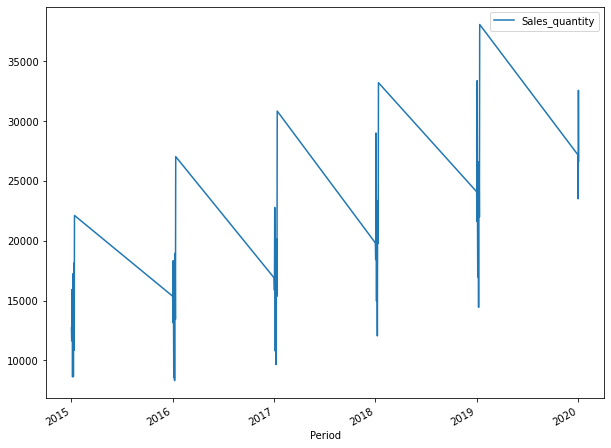

In [5]:
sales1.plot(figsize=(10,8))

In [6]:
len(sales1)

64

In [7]:
train = sales1.iloc[:54]
test = sales1.iloc[54:]

In [8]:
#Normalization of data
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

In [10]:
test_scaled

array([[0.31669346],
       [0.        ],
       [0.37321262],
       [0.51493358],
       [0.31965479],
       [1.        ],
       [0.53951265],
       [0.38404264],
       [0.7673238 ],
       [0.51544124]])

In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [12]:
#We will take 6 values to predict the time series data
n_input = 6
generator = TimeseriesGenerator(train_scaled,train_scaled,length = n_input,batch_size=1)

In [13]:
train_scaled[:6]

array([[0.17614203],
       [0.13253541],
       [0.30353082],
       [0.27580291],
       [0.01220826],
       [0.19333732]])

In [14]:
generator[1]

(array([[[0.13253541],
         [0.30353082],
         [0.27580291],
         [0.01220826],
         [0.19333732],
         [0.35667265]]]),
 array([[0.01308598]]))

In [15]:
len(generator)

48

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initializing the RNN

In [17]:
# Defining the model
rnn = Sequential()

# Adding input and hidden layers

In [18]:
rnn.add(LSTM(units=100,activation='relu',input_shape=(n_input,1)))

# Output Layers

In [19]:
rnn.add(Dense(units=1))

# Compiling the model

In [20]:
rnn.compile(optimizer='adam',loss='mse')

# Fitting the model

In [21]:
rnn.fit(generator,epochs=50)

Epoch 1/50
48/48 [==============================] - 4s 11ms/step - loss: 0.0874
Epoch 2/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0488
Epoch 3/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0494
Epoch 4/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 5/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0493
Epoch 6/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0514
Epoch 7/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 8/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0511
Epoch 9/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0490
Epoch 10/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 11/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 12/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 13/50
48/48 [=============================

In [22]:
test_scaled

array([[0.31669346],
       [0.        ],
       [0.37321262],
       [0.51493358],
       [0.31965479],
       [1.        ],
       [0.53951265],
       [0.38404264],
       [0.7673238 ],
       [0.51544124]])

In [23]:
train_scaled[-6:]

array([[0.62964293],
       [0.53101935],
       [1.        ],
       [0.55659286],
       [0.34522242],
       [0.66403351]])

In [24]:
predict_train = train_scaled[-6:]

In [25]:
predict_train = predict_train.reshape(1,n_input,1)

In [26]:
predict_train.shape

(1, 6, 1)

In [27]:
rnn.predict(predict_train)

array([[0.49272814]], dtype=float32)

In [28]:
test_scaled[0]

array([0.31669346])